In [1]:
import os

import jax
import jax.numpy as jnp
from jax import random,  vmap, jit
from jax import config
from jax import lax
from jax.flatten_util import ravel_pytree

import itertools
from functools import partial
from tqdm.auto import trange, tqdm
import time

from scipy.interpolate import griddata
from scipy.sparse import csr_matrix

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 4})


jax.config.update("jax_enable_x64", True)
from A4M2 import PKS
from auxx import gen_initX

In [2]:
rngseed=183
rng_key=random.PRNGKey(rngseed)

pos=jnp.array([[1,0,0],[-0.5,jnp.sqrt(3)/2,0],[-0.5,-jnp.sqrt(3)/2,0],[0,0,jnp.sqrt(2)]])

iniX=gen_initX(rng_key,J=2**20,r=0.5,pos=pos,plot=False)
T=1e-1
dt=1e-4

In [3]:
shape = iniX.shape
print(shape)

(1048576, 3)


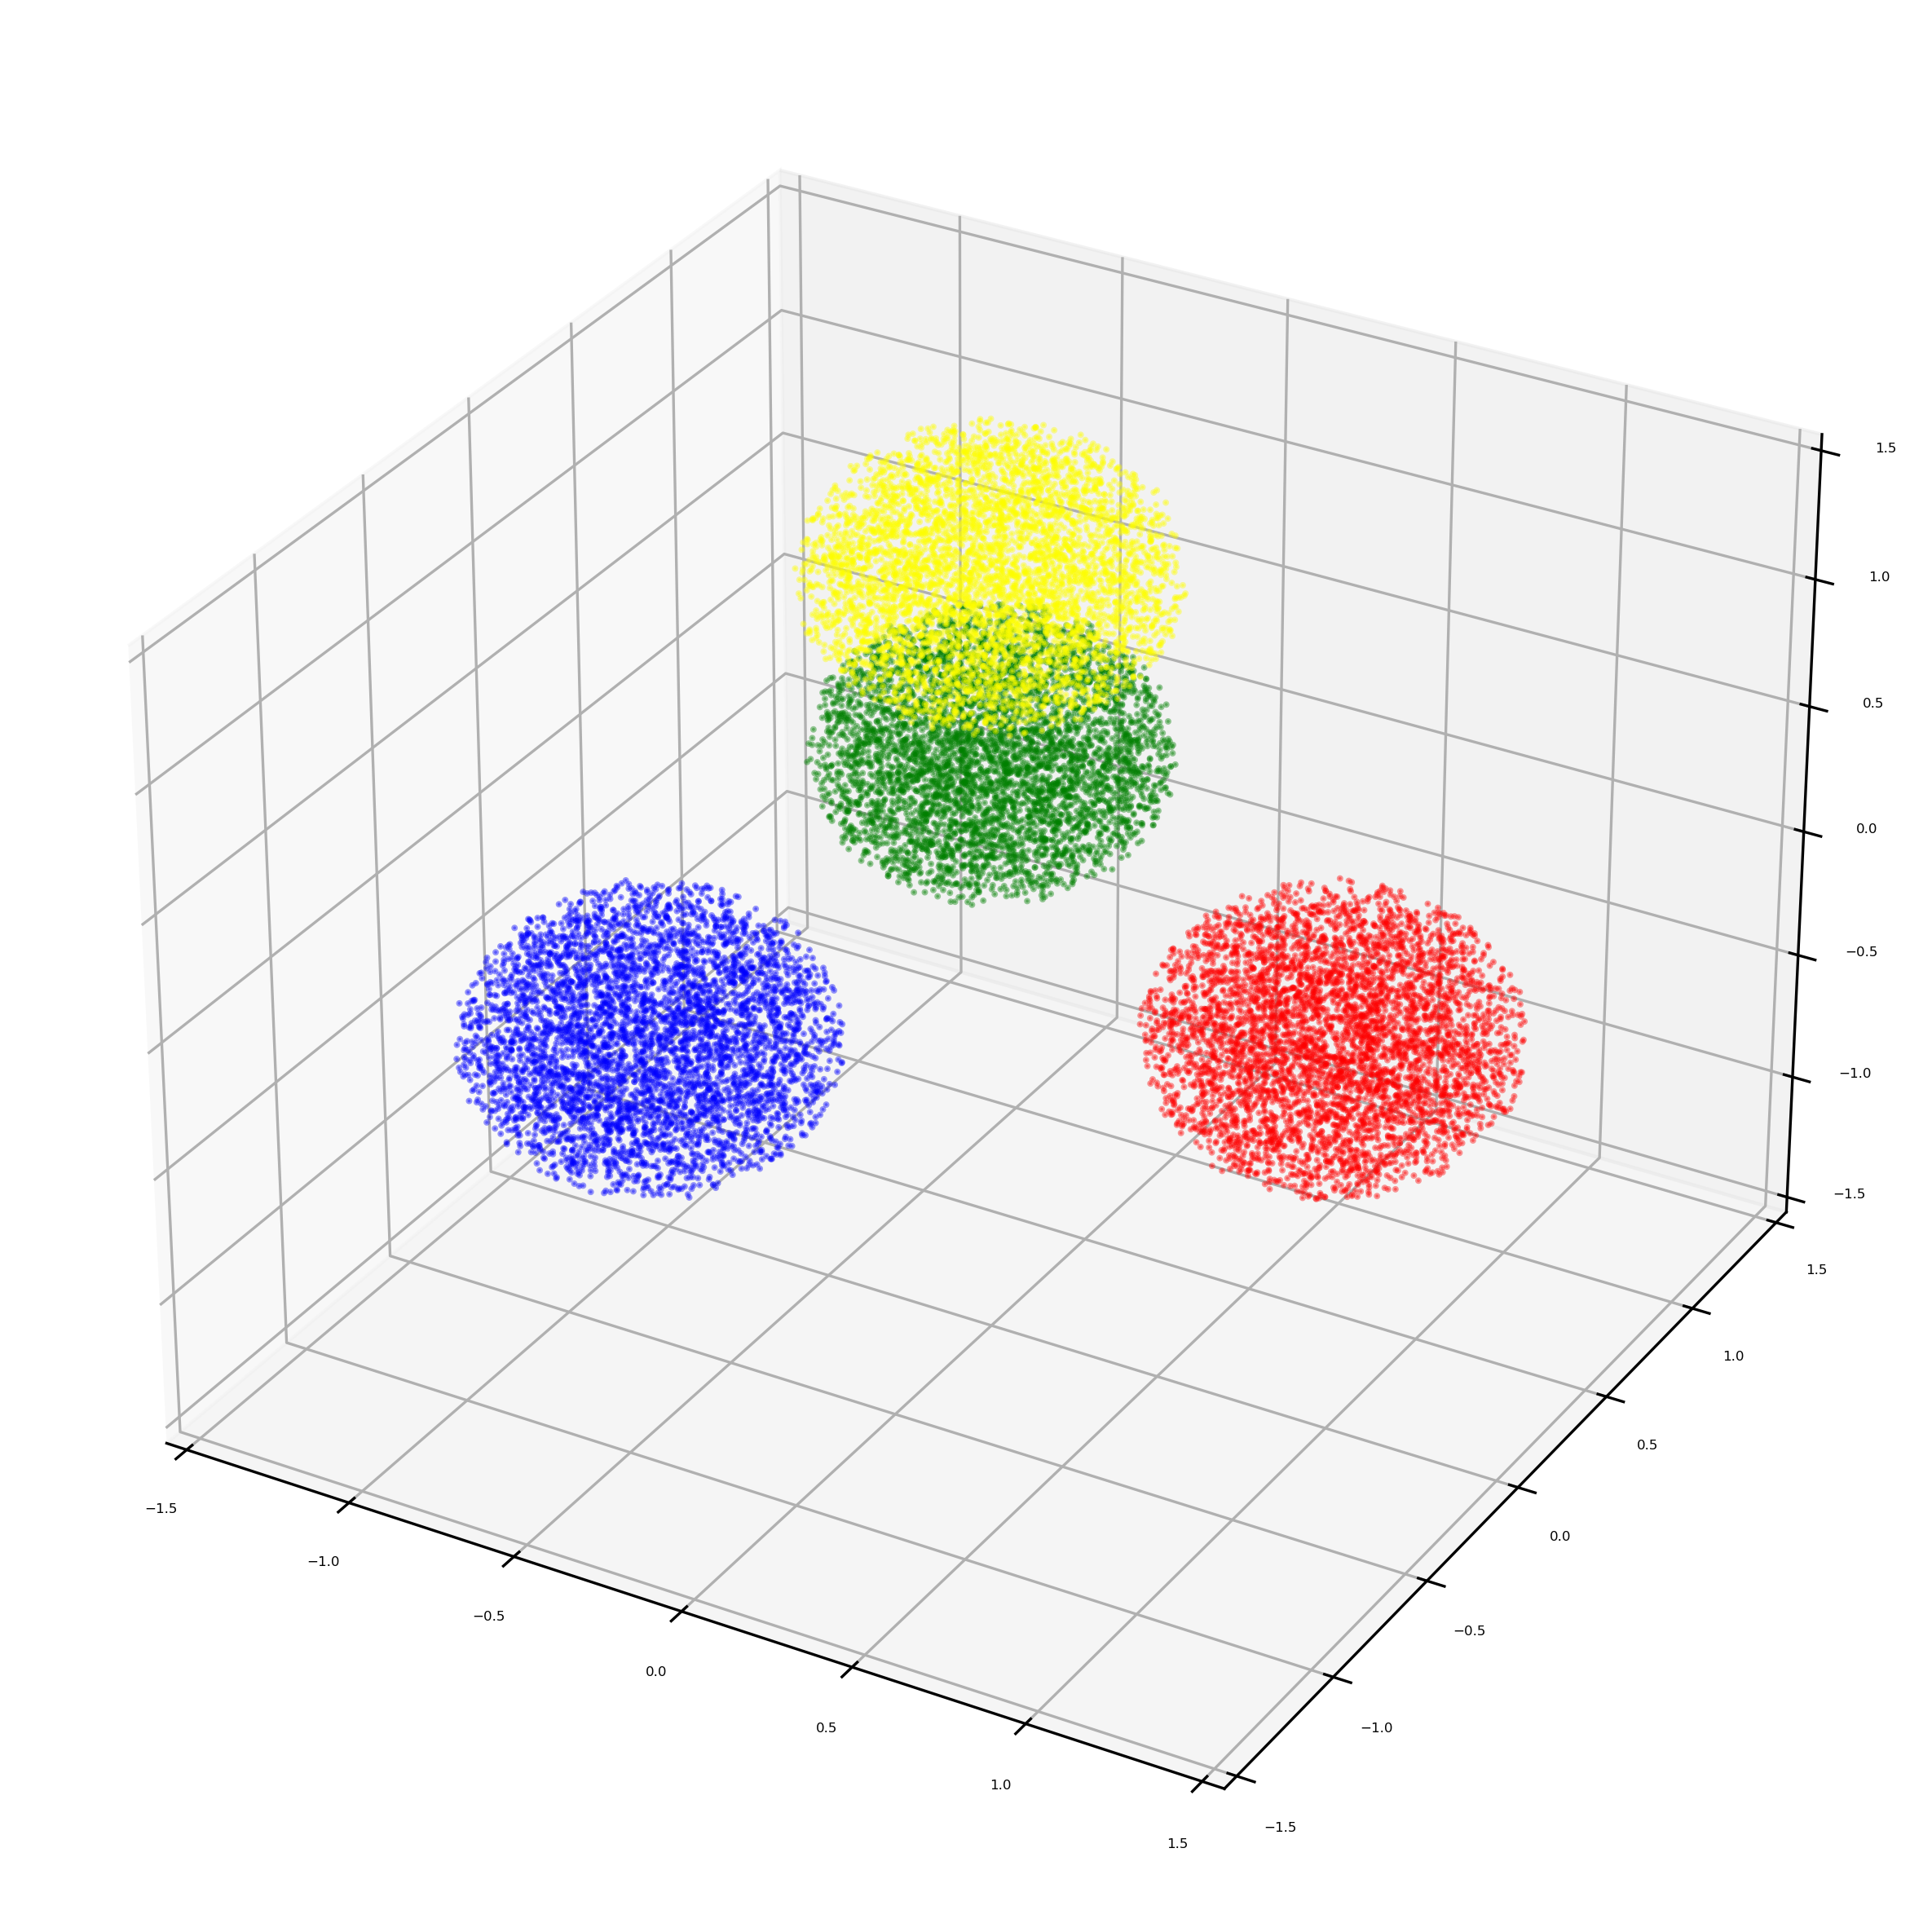

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

points = np.array(iniX)
total_points = points.shape[0]
points_per_sphere = total_points // 4 

sphere_indices = np.repeat(np.arange(4), points_per_sphere)

colors = ['red', 'green', 'blue', 'yellow']
sphere_colors = np.array(colors)[sphere_indices]

samples_per_sphere = 4500
sampled_points = []
sampled_colors = []

for sphere_id in range(4):
    start = sphere_id * points_per_sphere
    end = (sphere_id + 1) * points_per_sphere
    sphere_points = points[start:end] 
    
    selected_points = sphere_points[:samples_per_sphere]
    sampled_points.append(selected_points)
    sampled_colors.append(np.full(len(selected_points), colors[sphere_id]))

sampled_points = np.vstack(sampled_points)
sampled_colors = np.concatenate(sampled_colors)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter3D(
    sampled_points[:, 0], sampled_points[:, 1], sampled_points[:, 2],
    c=sampled_colors,
    alpha=0.4, 
    s=0.8,     
    depthshade=False  
)

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', 
           markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', 
           markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', 
           markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', 
           markerfacecolor='yellow', markersize=8)
]


plt.savefig('tetra_initial.png', dpi=300, bbox_inches='tight')
plt.show()